<a href="https://colab.research.google.com/github/kelverssg/notebooks/blob/master/Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parameters
μ  = 0.000129
σ  = 0.007295


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


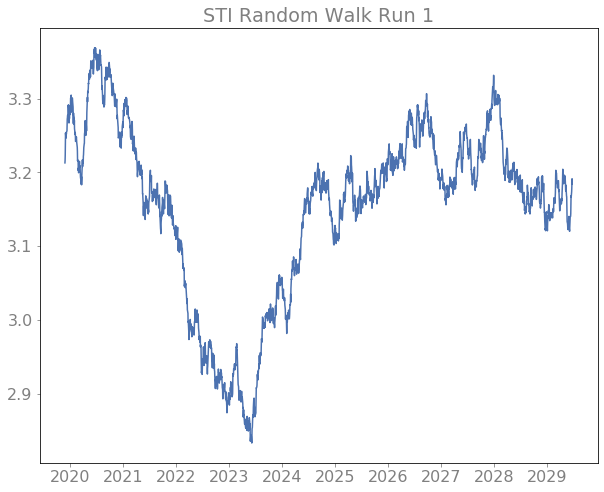

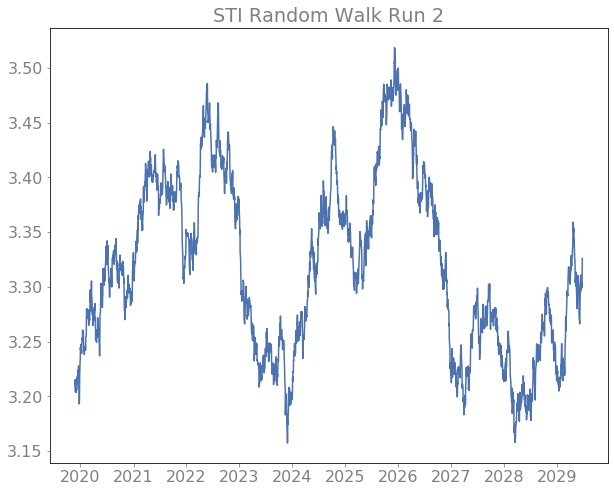

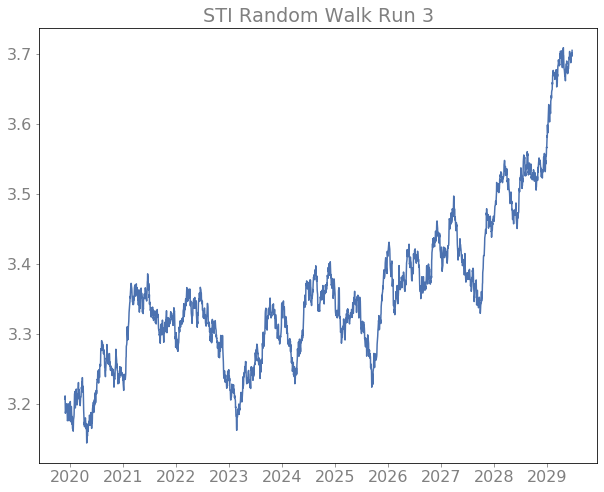

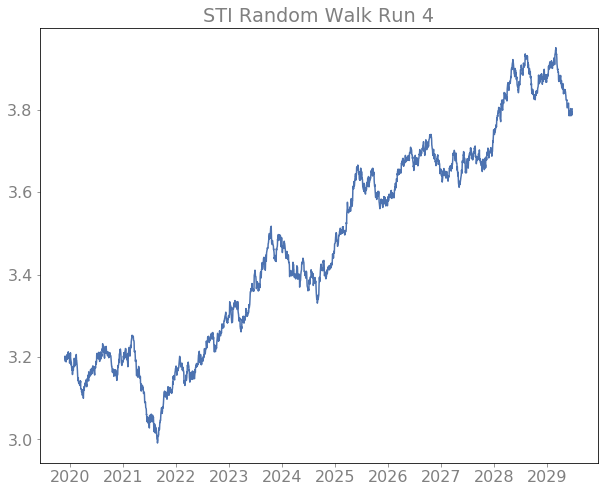

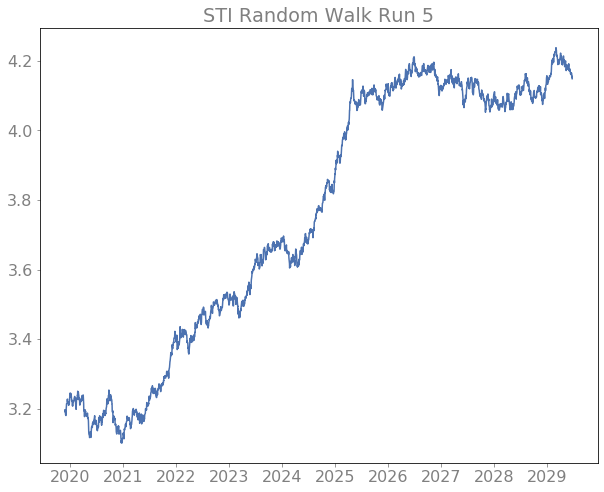

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib as mpl
import datetime as dt
import seaborn as sns

#Matplotlib codes for aesthetics
sns.set_palette('deep',20)
mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = mpl.rcParams['axes.labelcolor'] = 'gray'
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (10,8)

#Generate a list of workday dates, ignoring public holidays as this is just for illustration.
start_date = dt.date(2019, 11, 25)
wkday = 1
i=0
dates = []

while len(dates) < 2500:
    if wkday % 7 in [6,0]: 
        wkday += 1
        i += 1
        continue
    else:
        dates += [start_date+dt.timedelta(days = i)]
        wkday += 1
        i += 1

#Generate 5 random walk scenarios, locking the 'seed' for reproducible results.
daily_return_mean1 = 0.000129
daily_return_stdev = 0.007295
print('Parameters')
print('\u03bc',f' = {daily_return_mean1}')
print('\u03c3',f' = {daily_return_stdev}')
for i in range(0,50,10):
    starting_price = 3.20
    np.random.seed(i)
    random_walk = np.random.normal(daily_return_mean1, daily_return_stdev, 2500) #Gaussian random walk on daily returns
    price = starting_price + random_walk.cumsum()
    plt.plot(dates, price)
    plt.title(f'STI Random Walk Run {i//10 + 1}', color = 'gray')
    plt.show()

In [0]:
def random_walk(starting_price, daily_return_mean):
  random_walk = np.random.normal(daily_return_mean, daily_return_stdev, time_period) #Gaussian random walk on daily returns
  price = starting_price + random_walk.cumsum()
  return price[-1]

# Initialize test cases, change daily return mean to test higher returns
daily_return_mean1 = 0.000129
daily_return_stdev = 0.007295
initialiser = np.full((10000,1), starting_price)
time_period = 20 * 250 # years * number of trading days in a year

In [0]:
def monte_carlo_random_walk(initialiser, test_mean):
  import pandas as pd
  import functools
  df = pd.DataFrame.from_records(initialiser, columns = ['Starting Price'])
  df['Ending Price'] = df['Starting Price'].apply(functools.partial(random_walk, daily_return_mean = test_mean))
  return df

df = monte_carlo_random_walk(initialiser, daily_return_mean1)

Text(1.8, 0.7, 'Ending Price after\n20 years')

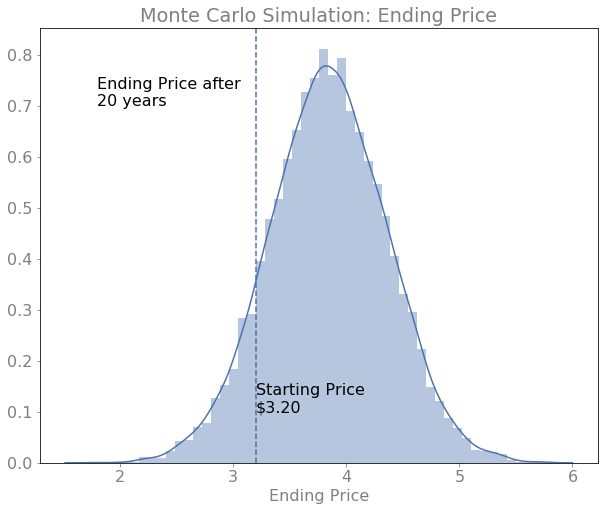

In [5]:
import seaborn as sns
mpl.rcParams['figure.figsize'] = (10,8)
sns.set_palette('deep',20)
sns.distplot(df['Ending Price'])
plt.axvline(starting_price, linestyle = '--')
plt.text(starting_price, 0.1, 'Starting Price\n${:.2f}'.format(starting_price))
plt.title('Monte Carlo Simulation: Ending Price', color = 'gray')
plt.text(1.8, 0.7, f'Ending Price after\n{round(time_period / 250)} years')

In [6]:
df.describe()

,Starting Price,Ending Price
count,1.000000e+04,10000.000000
mean,3.200000e+00,3.843365
std,5.080635e-13,0.518294
min,3.200000e+00,1.773757
25%,3.200000e+00,3.497322
50%,3.200000e+00,3.841641
75%,3.200000e+00,4.190396
max,3.200000e+00,5.740344


In [0]:
#Sensitivity analysis of assumed daily mean

test_means = [i/250/100 for i in range(1,21)]

def monte_carlo_mean(initialiser, test_mean):
  '''A function to return the mean of a Monte Carlo simulation, created to test the sensivity of input parameters.'''
  df = monte_carlo_random_walk(initialiser, test_mean)
  return df['Ending Price'].mean(), df['Ending Price'].std()

test_mean_results_all = [monte_carlo_mean(initialiser, i) for i in test_means]

In [8]:
test_mean_results = [i[0] for i in test_mean_results_all]
test_std_results = [i[1] for i in test_mean_results_all]
compounded_20 = [starting_price*(i*250+1)**(time_period / 250) for i in test_means]
percent_of_compounded = [round((i / j) * 100) for i, j in zip(test_mean_results, compounded_20)]
pct_of_compounded_plus1std = [round(((i+s) / j) * 100) for i, j, s in zip(test_mean_results, compounded_20, test_std_results)]
pct_of_compounded_minus1std = [round(((i-s) / j) * 100) for i, j, s in zip(test_mean_results, compounded_20, test_std_results)]
print(percent_of_compounded)
print(pct_of_compounded_plus1std)
print(pct_of_compounded_minus1std)

[87, 76, 66, 57, 49, 43, 37, 32, 28, 24, 21, 18, 16, 14, 12, 10, 9, 8, 7, 6]
[100, 87, 75, 64, 56, 48, 41, 36, 31, 27, 23, 20, 17, 15, 13, 11, 10, 8, 7, 6]
[74, 65, 57, 50, 43, 38, 33, 29, 25, 22, 19, 16, 14, 12, 11, 9, 8, 7, 6, 5]


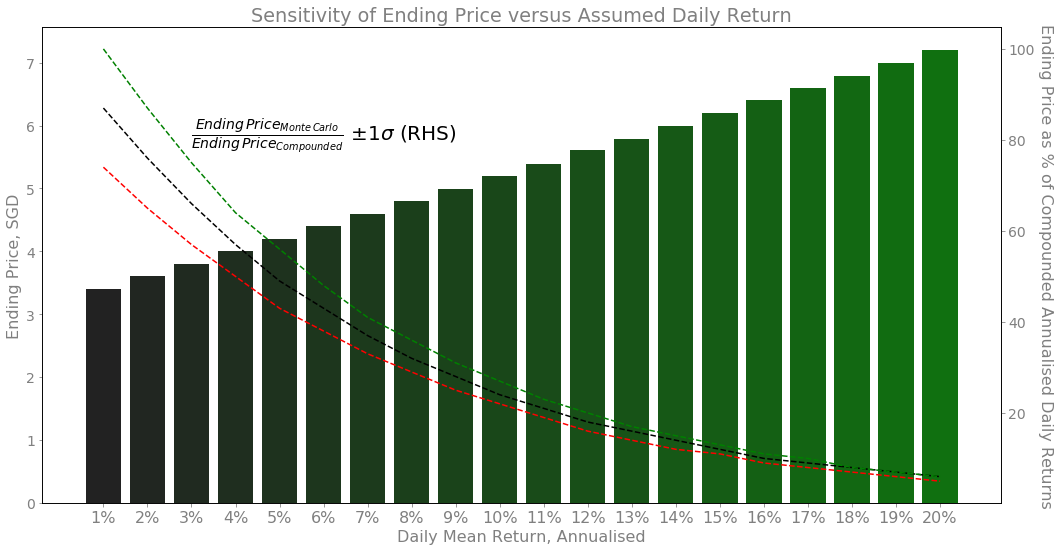

In [21]:
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['ytick.labelsize'] = 14
sns.set_palette(sns.dark_palette('green',20))
ax1 = sns.barplot(x=['{}%'.format(int(round(i*250*100))) for i in test_means], y=test_mean_results)
ax2 = plt.twinx()
ax2.plot(percent_of_compounded, 'k--')
ax2.plot(pct_of_compounded_plus1std, 'g--')
ax2.plot(pct_of_compounded_minus1std, 'r--')
#ax2.invert_yaxis()
ax2.set_ylabel('Ending Price as % of Compounded Annualised Daily Returns', rotation = 270, labelpad = 18)
ax1.set_xlabel('Daily Mean Return, Annualised')
ax1.set_ylabel('Ending Price, SGD')
plt.title('Sensitivity of Ending Price versus Assumed Daily Return', color = 'gray')
plt.text(2, 80, r'$\frac{Ending\/Price_{Monte\/Carlo}}{Ending\/Price_{Compounded}}$'+' $\pm$1$\sigma$ (RHS)', fontsize = 20)
plt.tight_layout()


In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

def mc_plot(df):
  sns.set_palette('deep',20)
  sns.distplot(df)
  plt.axvline(starting_price, linestyle = '--')
  plt.text(starting_price, 0.1, 'Starting Price\n${:.2f}'.format(starting_price))
  plt.title('Monte Carlo Simulation: Ending Price', color = 'gray')
  #plt.text(1.8, 0.7, f'Ending Price after\n{round(time_period / 250)} years')


def monte_carlo_random_walk2(initialiser, AnnualRet):
  import pandas as pd
  import functools
  df = pd.DataFrame.from_records(initialiser, columns = ['Starting Price'])
  np.random.seed(1388)
  df['Ending Price'] = df['Starting Price'].apply(functools.partial(random_walk, daily_return_mean = AnnualRet/100/250))
  return mc_plot(df['Ending Price'])

interact(monte_carlo_random_walk2, initialiser=widgets.fixed(initialiser), AnnualRet = widgets.IntSlider(min= 1, max= 20, step=1, value=20))

interactive(children=(IntSlider(value=20, description='AnnualRet', max=20, min=1), Output()), _dom_classes=('w…

<function __main__.monte_carlo_random_walk2>